In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

In [8]:
# 1. Cargar imagen y convertir a escala de grises
img = cv2.imread("../../datos/formas.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [9]:
# 2. Binarizar
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

In [10]:
# 3. Encontrar contornos
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [11]:
# 4. Crear lista de cuadros para GIF
frames = []
img_copy = img.copy()

In [12]:
for i, cnt in enumerate(contours):
    # Calcular área y perímetro
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)

    # Calcular centroide
    M = cv2.moments(cnt)
    if M["m00"] != 0:
        cx = int(M["m10"] / M["m00"])
        cy = int(M["m01"] / M["m00"])
    else:
        cx, cy = 0, 0

    # Aproximar contorno para identificar figura
    approx = cv2.approxPolyDP(cnt, 0.04 * perimeter, True)
    vertices = len(approx)
    if vertices == 3:
        shape = "Triangulo"
    elif vertices == 4:
        shape = "Cuadrado"
    elif vertices > 4:
        shape = "Circulo"
    else:
        shape = "Desconocida"

    # Dibujar contorno
    cv2.drawContours(img_copy, [cnt], -1, (0, 255, 0), 2)
    # Dibujar centroide y texto
    text = f"""{shape}\n A={int(area)}  \n P={int(perimeter)} \n C=({cx},{cy})"""
    (text_width, text_height), baseline = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.4, 1)
    cv2.rectangle(img_copy, (cx - 50, cy - text_height - 5), (cx + text_width, cy + 5), (0, 0, 0), -1)
    cv2.putText(
        img_copy, text, (cx - 50, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255, 255, 255), 1
    )

    # Guardar frame para GIF
    bgr_frame = cv2.cvtColor(img_copy.copy(), cv2.COLOR_BGR2RGB)
    pil_frame = Image.fromarray(bgr_frame)
    frames.append(pil_frame)

In [13]:
# Guardar GIF
frames[0].save(
    "../../resultados/shapes_detected.gif", save_all=True, append_images=frames[1:], duration=600, loop=0
)

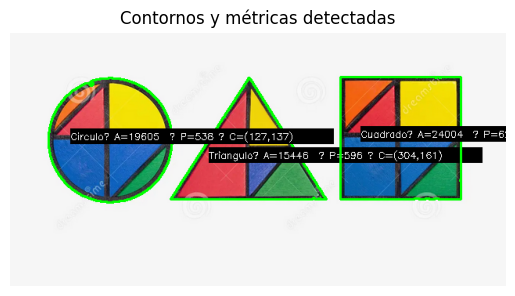

In [14]:
# Mostrar última imagen
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.title("Contornos y métricas detectadas")
plt.axis("off")
plt.show()